# Hands-On #4

**Chapter 7 – Ensemble Learning and Random Forests**

Due date: 2022-02-28

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"04_Random_Forests_Stallman_Torvalds.pdf".

Submission via blackboard (UA) or Google Form (see notion, LPC).

Feel free to answer free text questions in text cells using markdown and possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended for you to try to understand every line of code.   
Big blocks of code are usually meant to just be clicked through.**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582_Sp22/blob/main/Exercises/04_Random_Forests.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [1]:
import sys
import sklearn
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,interpolation="nearest")
    plt.axis("off")

In [3]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [4]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

### Task 1 

**Task 1a)**   
As we did in the [last assignment](https://github.com/BoGGoG/2022-PH482-PH582-private/blob/main/Exercises/03_Decision_Trees_Solution.ipynb), load the [moon dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) with 500 samples, 0.3 for the noise value, and `random_state` to `42` . Also, perform train_test_split on it. 

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [6]:
# Loading the dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

In [7]:
# Performing the training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

Now, we are going to build a voting classifier with the following estimators:   
- logistic regression (`solver="lbfgs", random_state=42`)
- random forest classifier (`n_estimators=100, random_state=42`) 
- svc (`gamma="scale", random_state=42`)
    
**Task 1b)**   
Initialize those four objects with the given parameters. 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [27]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)         # logistic regression
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)   # random forest classifier
svm_clf = SVC(gamma="scale", random_state=42)                         # support vector machines

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

In [16]:
from sklearn.ensemble import VotingClassifier

In [28]:
# Build the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

**Task 1c)**  
Explain `voting='hard"` in the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html). What is soft voting?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

Task 1c) answer: A hard voting classifier makes a count of the votes that are assgined to each class from each classifier in the ensemble, and just picks the class with the highest number of votes. On the other hand, a soft voting classifier is able to compute the average estiamated class probability for each class from each classifier, and picks the class with the highest probability.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

**Task 1d)**  
Finally, fit the voting classifier to your train dataset. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [20]:
# fit here
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

### Task 2

Now we are going to print out the accuracy scores for each of the classifier above. 

Complete the code below as indicated in the comments.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [29]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    # predict the y_test with each classifier 
    y_pred = clf.predict(X_test)
    # calculate the accuracy score for each
    classifier_accuracy_score = accuracy_score(y_test,y_pred)
    # finally, we will print them out 
    print(clf.__class__.__name__, classifier_accuracy_score)

LogisticRegression 0.85
RandomForestClassifier 0.88
SVC 0.87
VotingClassifier 0.87


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

### Task 3: Soft voting

**Task 3a)**  
Now  repeat everything in Tasks 1 and 2 but for soft voting. To do that, just change the value in the ```voting``` parameter to `soft` and set the `probability` to `True`.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [42]:
# Build the models
log_clf = LogisticRegression(solver="lbfgs", random_state=42)         # logistic regression
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)   # random forest classifier
svm_clf = SVC(gamma="scale", random_state=42, probability=True)       # support vector machines

In [43]:
# Build the soft voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')

In [44]:
# fit to a new voting classifier with the 'soft' parameter. 
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [45]:
# calculate the accuracy scores. 
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    # predict the y_test with each classifier 
    y_pred = clf.predict(X_test)
    # calculate the accuracy score for each
    classifier_accuracy_score = accuracy_score(y_test,y_pred)
    # finally, we will print them out 
    print(clf.__class__.__name__, classifier_accuracy_score)

LogisticRegression 0.85
RandomForestClassifier 0.88
SVC 0.87
VotingClassifier 0.89


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

**Task 3b)**  
How are the results different?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

Task 3b) answer: The increase on the performance of the voting classifier is due to the soft voting ensemble, since it is able to give more weight to the highly confident votes. 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

# Bagging ensembles

### Task 4 Bagging Classifier

**Task 4a)**  
- Initialize a [bagging classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) for a decision tree classifier with the following parameters:
    + `n_estimators = 500`
    + `max_samples = 100`
    + `bootstrap = True`
    + `random_state = 42`

- Fit the bagging classifier to the training data and make a prediction.  
- Calculate the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). 

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [53]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples=100, bootstrap=True, random_state=42)

In [54]:
# fit the classifier and calculate the prediction. 
bag_clf.fit(X_train,y_train) 
y_pred = bag_clf.predict(X_test)

In [55]:
# Obtain the accuracy score
bag_clr_accuracy_score = accuracy_score(y_test, y_pred)
print(bag_clr_accuracy_score)

0.9


↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

**Task 4b**  
Do the same for a Decision Tree Classifier. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [56]:
tree_clf = DecisionTreeClassifier()
 
tree_clf.fit(X_train,y_train)                              # fit
y_pred_tree = tree_clf.predict(X_test)                     # predict
pred_tree_accuracy_score = accuracy_score(y_test, y_pred)  # accuracy

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

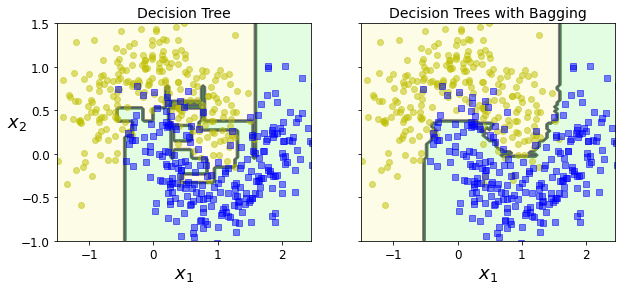

In [57]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

## Feature importance

Let's use the [mnist](https://www.openml.org/d/554) dataset. It contains 60k handwritten digits for training and 10k for testing.

In [58]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

### Task 5: Feature Importance

**Task 5a)**  
Initialize a random forest classifier with 100 estimators. 
Fit it to mnist["data"] and mnist["target"]

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
#rand_forest_clf = 
# fit 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

In [ ]:
plot_digit(rand_forest_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rand_forest_clf.feature_importances_.min(), rand_forest_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

**Task 5b)   
What can you infer from the visualization above? 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

Task 5b) answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

# AdaBoost

### Task 6: AdaBoost
Now, initialize an Ada Boost classifier for a decision tree classifier with the following parameters:   
- max_depth = 1 - Decision Tree classifier parameter
- n_estimators = 200 - Ada Boost classifier parameter
- learning_rate = 0.5 - Ada Boost classifier parameter
- algorithm = "SAMME.R" - Ada Boost classifier parameter
- random_state = 42 - Ada Boost classifier parameter

Fit it to the training data. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#ada_clf = 
#fit 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

Plot the decision boundary for ada_clf, X, y

In [ ]:
plot_decision_boundary(ada_clf, X, y)

In [ ]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

plt.show()

In [ ]:
list(m for m in dir(ada_clf) if not m.startswith("_") and m.endswith("_"))

# Gradient Boosting

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [ ]:
plt.scatterA(X, y)

### Task 7: Gradient Boosting

**Task 7a)**  
In this task, we will be doing the following.  
1) Initialize a decision tree regressor with `max_depth=2` and `random_state=42`.
2) Fit it to X and y.
3) Substract the difference between the predicted y and the actual y. 
4) Fit the new classifier with the same parameters for the value in step 3. 
5) repeat this one more time. You should obtain values for y2 and y3. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#tree_reg1 = 
# fit

In [ ]:
#y2 = 
#tree_reg2 = 
#fit to X and y2

In [ ]:
#y3 = 
#tree_reg3 = 
#fit to X and y3

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

In [ ]:
X_new = np.array([[0.8]])

The new predicted `y` should be the sum of the predictions for the `X_new` performed by each tree. 

In [ ]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [ ]:
y_pred

**Task 7b)**  
What do plots below show? 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

Task 7b) answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

In [ ]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

**Task 7c)**  
We are also going to compare two gradient boosting regressor objects. 
Both with `max_depth=2` and `random_state=42`, but one will be 'fast' and one will be 'slow'. 
For the fast one, set the learning rate to 1 and number of estimators to 3. 
For the slow one, set the learning rate to 0.1 and number of estimators to 200. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

#gbrt_fast = 
#gbrt_slow = 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 

Next, we are fitting them to the data. 

In [ ]:
gbrt_fast.fit(X, y)
gbrt_slow.fit(X, y)

In [ ]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt_fast], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt_fast.learning_rate, gbrt_fast.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

## Gradient Boosting with Early stopping

In this section, we are going to be looking for the lowest MSE in a set of boosted trees. Just run the cells below and discuss the results.  

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

In [ ]:
min_error = np.min(errors)

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

In [ ]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [ ]:
print(gbrt.n_estimators)

In [ ]:
print("Minimum validation MSE:", min_val_error)

## Using XGBoost

### Task 8
Finally, we move to an XGBoost regressor - arguably one of the most popular and widely-used algorithms nowadays. 

First, make sure you have it installed. 

In [ ]:
pip install xgboost

In [ ]:
import xgboost

In [ ]:
xgb_reg = xgboost.XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = np.sqrt(mean_squared_error(y_val, y_pred)) # Not shown
print("Validation MSE:", val_error)           # Not shown

**Task 8**  
Do the same thing as above but while fitting, add a validation sets and set `early_stopping_rounds=2`. To do that, you want to add the `eval_set` parameter and set `[(X_val, y_val)]` value there. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓
your code goes below

In [ ]:
val_errors_with_stop = []
# fit
# xgb_reg = 
# add the validation set and an early stopping, fit
#
val_errors_with_stop = xgb_reg.evals_result()['validation_0']['rmse']
y_pred = xgb_reg.predict(X_val)
val_error = np.sqrt(mean_squared_error(y_val, y_pred))  # Not shown
print("Validation RMSE:", val_error)            # Not shown

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 